In [1]:
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

from networkx.algorithms import community
from uoineuro.coupling_utils import *
from uoineuro.utils import tighten_scatter_plot

%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling')

In [3]:
# consolidate V1 results
v1_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
n_v1_fits = len(v1_results_paths)
v1_results = [h5py.File(v1_results_path, 'r')
              for v1_results_path in v1_results_paths]
# extract coupling coefficients
v1_lasso_ccs = [np.median(v1_result['lasso/coupling_coefs'], axis=0)
                for v1_result in v1_results]
v1_uoi_lasso_ccs = [np.median(v1_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for v1_result in v1_results]
v1_glmnet_ccs = [np.median(v1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for v1_result in v1_results]
v1_uoi_poisson_ccs = [np.median(v1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for v1_result in v1_results]

In [4]:
# consolidate M1 results
m1_results_paths = [os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_01_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_02_coupling.h5')]
n_m1_fits = len(m1_results_paths)
m1_results = [h5py.File(m1_results_path, 'r')
              for m1_results_path in m1_results_paths]
# extract coupling coefficients
m1_lasso_ccs = [np.median(m1_result['lasso/coupling_coefs'], axis=0)
                for m1_result in m1_results]
m1_uoi_lasso_ccs = [np.median(m1_result['uoi_lasso_bic/coupling_coefs'], axis=0)
              for m1_result in m1_results]
m1_glmnet_ccs = [np.median(m1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for m1_result in m1_results]
m1_uoi_poisson_ccs = [np.median(m1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for m1_result in m1_results]

In [5]:
n_datasets = n_m1_fits + n_v1_fits

In [6]:
lasso_ccs = v1_lasso_ccs + m1_lasso_ccs
glmnet_ccs = v1_glmnet_ccs + m1_glmnet_ccs
uoi_lasso_ccs = v1_uoi_lasso_ccs + m1_uoi_lasso_ccs
uoi_poisson_ccs = v1_uoi_poisson_ccs + m1_uoi_poisson_ccs
labels = n_v1_fits * [r'\textbf{V1}'] + n_m1_fits * [r'\textbf{M1}']

# Correlations

In [7]:
baseline_corrs_pearson = [coupling_coef_corrs(
    glmnet_ccs[idx],
    lasso_ccs[idx],
    correlation='pearson')
    for idx in range(n_datasets)]
uoi_corrs_pearson = [coupling_coef_corrs(
    uoi_poisson_ccs[idx],
    uoi_lasso_ccs[idx],
    correlation='pearson')
    for idx in range(n_datasets)]

In [8]:
baseline_corrs_spearman = [coupling_coef_corrs(
    glmnet_ccs[idx],
    lasso_ccs[idx],
    correlation='spearman')
    for idx in range(n_datasets)]
uoi_corrs_spearman = [coupling_coef_corrs(
    uoi_poisson_ccs[idx],
    uoi_lasso_ccs[idx],
    correlation='spearman')
    for idx in range(n_datasets)]

In [9]:
baseline_corrs_cosine = [coupling_coef_corrs(
    glmnet_ccs[idx],
    lasso_ccs[idx],
    correlation='cosine')
    for idx in range(n_datasets)]
uoi_corrs_cosine = [coupling_coef_corrs(
    uoi_poisson_ccs[idx],
    uoi_lasso_ccs[idx],
    correlation='cosine')
    for idx in range(n_datasets)]

In [10]:
baselines = [baseline_corrs_pearson,
             baseline_corrs_spearman,
             baseline_corrs_cosine]
uois = [uoi_corrs_pearson,
        uoi_corrs_spearman,
        uoi_corrs_cosine]

Text(-0.02, 0.5, '\\textbf{Frequency}')

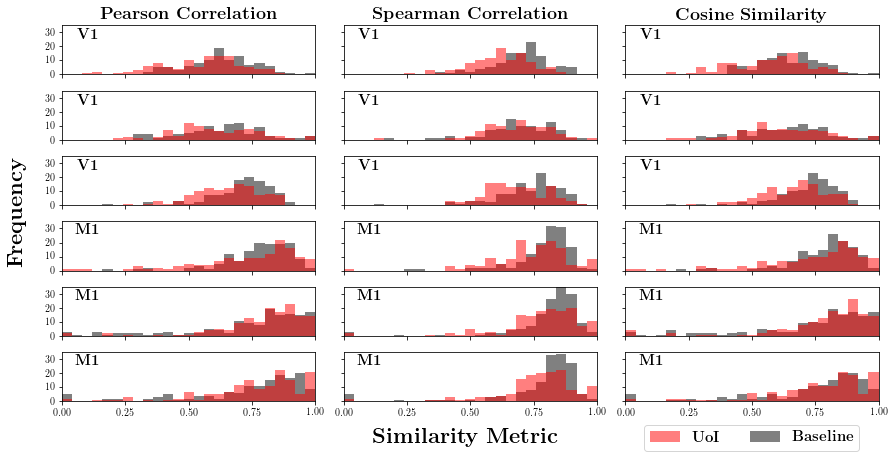

In [11]:
fig, axes = plt.subplots(n_datasets, 3,
                         figsize=(n_datasets * 2, 6),
                         sharex=True,
                         sharey=True)
bins = np.linspace(0, 1, 26)

for idx in range(n_datasets):
    for metric in range(3):
        ax = axes[idx, metric]
        ax.hist(
            baselines[metric][idx],
            bins=bins,
            color='gray',
            alpha=1.)
        ax.hist(
            uois[metric][idx],
            bins=bins,
            color='red',
            alpha=0.5)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 35])
        ax.set_xticks([0, 0.25, 0.50, 0.75, 1.0])
        ax.set_yticks([0, 10, 20, 30])
        ax.tick_params(labelsize=10)
        ax.text(
            x=0.1, y=0.8, s=labels[idx],
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=15,
            transform=ax.transAxes)

axes[0, 0].set_title(r'\textbf{Pearson Correlation}',
                     fontsize=18)
axes[0, 1].set_title(r'\textbf{Spearman Correlation}',
                     fontsize=18)
axes[0, 2].set_title(r'\textbf{Cosine Similarity}',
                     fontsize=18)

plt.tight_layout()

axes[0, 0].hist([], color='r', alpha=0.5, label=r'\textbf{UoI}')
axes[0, 0].hist([], color='gray', label=r'\textbf{Baseline}')
axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.83, -0.07),
    ncol=2,
    fancybox=True,
    prop={'size': 15})

fig.text(
    x=0.5, y=-0.02,
    s=r'\textbf{Similarity Metric}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{Frequency}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')
    
#plt.savefig('correlations.pdf', bbox_inches='tight')

# Selection Profiles by Chance

In [15]:
baseline_sel_profs = [selection_profiles_by_chance(
    glmnet_ccs[idx],
    lasso_ccs[idx])
    for idx in range(n_datasets)]
uoi_sel_profs = [selection_profiles_by_chance(
    uoi_poisson_ccs[idx],
    uoi_lasso_ccs[idx])
    for idx in range(n_datasets)]

In [16]:
for idx in range(n_datasets):
    baseline_sel_profs[idx][baseline_sel_profs[idx] == 0] = 1e-20
    uoi_sel_profs[idx][uoi_sel_profs[idx] == 0] = 1e-20

Text(-0.02, 0.5, '\\textbf{Frequency}')

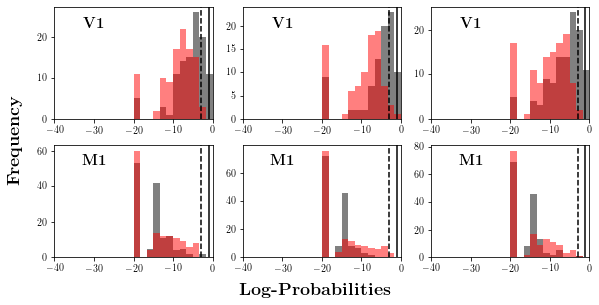

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
axes_list = axes.ravel()

for idx in range(n_datasets):
    ax = axes_list[idx]
    bins = np.linspace(-40, 0, 25)
    ax.hist(np.log10(baseline_sel_profs[idx]), bins=bins, color='gray')
    ax.hist(np.log10(uoi_sel_profs[idx]), bins=bins, color='red', alpha=0.5)
    ax.axvline(np.log10(0.1), color='k')
    ax.axvline(np.log10(0.001), color='k', linestyle='--')
    ax.set_xlim([-40, 0])
    ax.tick_params(labelsize=10)
    ax.text(
        x=0.25, y=0.85, s=labels[idx],
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=15,
        transform=ax.transAxes)
plt.tight_layout()
    
axes[0, 0].hist([], color='r', alpha=0.5, label=r'\textbf{UoI}')
axes[0, 0].hist([], color='gray', label=r'\textbf{Baseline}')
axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.83, 0.1),
    ncol=1,
    fancybox=True,
    prop={'size': 15})

fig.text(
    x=0.5, y=-0.02,
    s=r'\textbf{Log-Probabilities}',
    fontsize=18,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{Frequency}',
    fontsize=18,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

#plt.savefig('selection_profile_probabilities.pdf', bbox_inches='tight')

# Graph Metrics

In [19]:
lasso_graphs = [create_directed_graph(lasso_ccs[idx], weighted=True)
                for idx in range(n_datasets)]
glmnet_graphs = [create_directed_graph(glmnet_ccs[idx], weighted=True)
                 for idx in range(n_datasets)]
uoi_lasso_graphs = [create_directed_graph(uoi_lasso_ccs[idx], weighted=True)
                    for idx in range(n_datasets)]
uoi_poisson_graphs = [create_directed_graph(uoi_poisson_ccs[idx], weighted=True)
                      for idx in range(n_datasets)]

In [20]:
graphs = [lasso_graphs, glmnet_graphs, uoi_lasso_graphs, uoi_poisson_graphs]
n_graphs = len(graphs)

In [21]:
modularity = np.zeros((n_graphs, n_datasets))

for graph in range(n_graphs):
    for dataset in range(n_datasets):
        comp = community.greedy_modularity_communities(graphs[graph][dataset].to_undirected(reciprocal=True))
        modularity[graph, dataset] = community.modularity(
            graphs[graph][dataset].to_undirected(reciprocal=True),
            comp)

In [23]:
closeness = [
    [np.array(list(nx.algorithms.centrality.closeness_centrality(graphs[idx][dataset]).values()))
     for dataset in range(n_datasets)]
     for idx in range(n_graphs)
]
in_degree = [
    [np.array(list(dict(graphs[idx][dataset].in_degree()).values()))
     for dataset in range(n_datasets)]
     for idx in range(n_graphs)
]
out_degree = [
    [np.array(list(dict(graphs[idx][dataset].out_degree()).values()))
     for dataset in range(n_datasets)]
     for idx in range(n_graphs)
]

In [24]:
metrics = [in_degree, out_degree]

Text(-0.02, 0.5, '\\textbf{Poisson Model}')

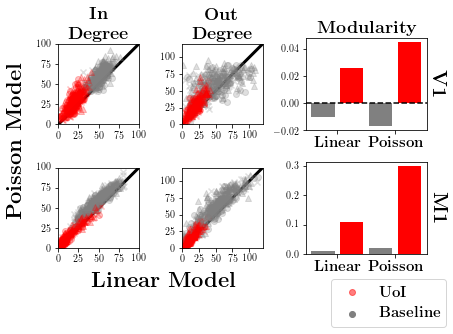

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4),
                         gridspec_kw={'width_ratios': [1, 1, 1.5]})

markers = ['o', 'x', '^']

for dataset in range(n_v1_fits):
    for idx, metric in enumerate(metrics):
        ax = axes[0, idx]
        ax.scatter(
            metric[0][dataset],
            metric[1][dataset],
            color='gray',
            marker=markers[dataset],
            alpha=0.25)
        ax.scatter(
            metric[2][dataset],
            metric[3][dataset],
            color='red',
            marker=markers[dataset],
            alpha=0.25)
        ax.tick_params(labelsize=10)
        
for dataset in range(n_m1_fits):
    for idx, metric in enumerate(metrics):
        ax = axes[1, idx]
        ax.scatter(
            metric[0][dataset + n_v1_fits],
            metric[1][dataset + n_v1_fits],
            color='gray',
            marker=markers[dataset],
            alpha=0.25)
        ax.scatter(
            metric[2][dataset + n_v1_fits],
            metric[3][dataset + n_v1_fits],
            color='red',
            marker=markers[dataset],
            alpha=0.25)
        ax.tick_params(labelsize=10)
        
axes[0, 2].bar(
    x=np.arange(n_graphs),
    height=[modularity[0, :3].mean(), modularity[2, :3].mean(),
            modularity[1, :3].mean(), modularity[3, :3].mean()],
    color=['gray', 'red', 'gray', 'red'])

axes[0, 2].axhline(0, linestyle='--', color='k')

axes[1, 2].bar(
    x=np.arange(n_graphs),
    height=[modularity[0, 3:].mean() + 0.01, modularity[2, 3:].mean(),
            modularity[1, 3:].mean(), modularity[3, 3:].mean()],
    color=['gray', 'red', 'gray', 'red'])

ylabels = [r'\textbf{V1}', r'\textbf{M1}']

for idx, ax in enumerate(axes[:, 2]):
    ax.tick_params(labelsize=10)
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{Linear}', r'\textbf{Poisson}'], fontsize=15)
    ax.set_ylabel(ylabels[idx],
                  fontsize=20,
                  rotation=270,
                  labelpad=20)
    ax.yaxis.set_label_position("right")
    
for ax in axes[:, 0]:
    tighten_scatter_plot(ax, bounds=[0, 100],
                         line_kwargs={'color': 'black'})
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks(ax.get_xticks())

for ax in axes[:, 1]:
    tighten_scatter_plot(ax, bounds=[0, 120],
                         line_kwargs={'color': 'k'})
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks(ax.get_xticks())
    
axes[0, 0].set_title(r'\textbf{In}' '\n' r'\textbf{Degree}',
                     fontsize=18)
axes[0, 1].set_title(r'\textbf{Out}' '\n' r'\textbf{Degree}',
                     fontsize=18)
axes[0, 2].set_title(r'\textbf{Modularity}',
                     fontsize=18)

plt.tight_layout()

axes[0, 0].scatter([], [], color='r', alpha=0.5, label=r'\textbf{UoI}')
axes[0, 0].scatter([], [], color='gray', label=r'\textbf{Baseline}')
axes[0, 0].legend(
    loc='lower center',
    bbox_transform=fig.transFigure,
    bbox_to_anchor=(0.84, -0.17),
    ncol=1,
    fancybox=True,
    prop={'size': 15})

fig.text(
    x=0.32, y=0.01,
    s=r'\textbf{Linear Model}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{Poisson Model}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')
    
# plt.savefig('poisson_vs_lasso_metrics.pdf', bbox_inches='tight')

# Supplementary Figure

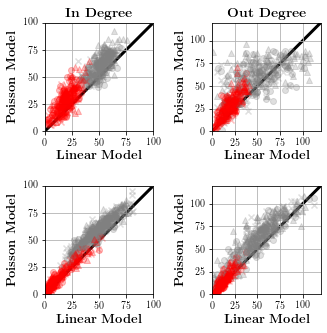

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5),
                         gridspec_kw={'width_ratios': [1, 1]})

markers = ['o', 'x', '^']

for dataset in range(n_v1_fits):
    for idx, metric in enumerate(metrics):
        ax = axes[0, idx]
        ax.scatter(
            metric[0][dataset],
            metric[1][dataset],
            color='gray',
            marker=markers[dataset],
            alpha=0.25)
        ax.scatter(
            metric[2][dataset],
            metric[3][dataset],
            color='red',
            marker=markers[dataset],
            alpha=0.25)
        ax.tick_params(labelsize=10)
        
for dataset in range(n_m1_fits):
    for idx, metric in enumerate(metrics):
        ax = axes[1, idx]
        ax.scatter(
            metric[0][dataset + n_v1_fits],
            metric[1][dataset + n_v1_fits],
            color='gray',
            marker=markers[dataset],
            alpha=0.25)
        ax.scatter(
            metric[2][dataset + n_v1_fits],
            metric[3][dataset + n_v1_fits],
            color='red',
            marker=markers[dataset],
            alpha=0.25)
        ax.tick_params(labelsize=10)
        
for ax in axes[:, 0]:
    tighten_scatter_plot(ax, bounds=[0, 100],
                         line_kwargs={'color': 'black'})
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks(ax.get_xticks())

for ax in axes[:, 1]:
    tighten_scatter_plot(ax, bounds=[0, 120],
                         line_kwargs={'color': 'k'})
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks(ax.get_xticks())
    
for ax in axes.ravel():
    ax.set_xlabel(r'\textbf{Linear Model}', fontsize=13)
    ax.set_ylabel(r'\textbf{Poisson Model}', fontsize=13)
    ax.grid('on')
    ax.set_axisbelow(True)

axes[0, 0].set_title(r'\textbf{In Degree}', fontsize=14)
axes[0, 1].set_title(r'\textbf{Out Degree}', fontsize=14)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

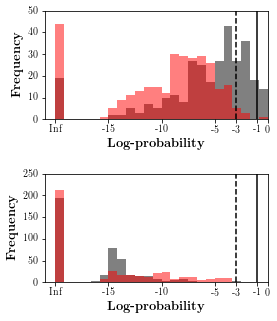

In [73]:
fig, axes = plt.subplots(2, 1, figsize=(4, 5))

bins = np.linspace(-20, 0, 25)
axes[0].hist(np.log10(np.concatenate(baseline_sel_profs[:3])), bins=bins, color='gray')
axes[0].hist(np.log10(np.concatenate(uoi_sel_profs[:3])), bins=bins, color='red', alpha=0.5)

bins = np.linspace(-20, 0, 25)
axes[1].hist(np.log10(np.concatenate(baseline_sel_profs[3:])), bins=bins, color='gray')
axes[1].hist(np.log10(np.concatenate(uoi_sel_profs[3:])), bins=bins, color='red', alpha=0.5)

for ax in axes:
    ax.axvline(np.log10(0.1), color='k')
    ax.axvline(np.log10(0.001), color='k', linestyle='--')
    ax.set_xlim([-21, 0])
    ax.set_xticks([-20, -15, -10, -5, -3, -1, 0])
    ax.set_xticklabels(['Inf', -15, -10, -5, -3, -1, 0])
    ax.set_xlabel(r'\textbf{Log-probability}', fontsize=13)
    ax.set_ylabel(r'\textbf{Frequency}', fontsize=13)
    
axes[0].set_ylim([0, 50])
axes[1].set_ylim([0, 250])

plt.subplots_adjust(hspace=0.5, wspace=0.5)

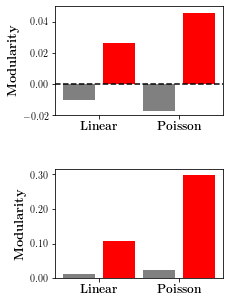

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(3, 5))

axes[0].bar(
    x=np.arange(n_graphs),
    height=[modularity[0, :3].mean(), modularity[2, :3].mean(),
            modularity[1, :3].mean(), modularity[3, :3].mean()],
    color=['gray', 'red', 'gray', 'red'])

axes[0].axhline(0, linestyle='--', color='k')
axes[0].set_ylim([-0.02, 0.05])
axes[1].bar(
    x=np.arange(n_graphs),
    height=[modularity[0, 3:].mean() + 0.01, modularity[2, 3:].mean(),
            modularity[1, 3:].mean(), modularity[3, 3:].mean()],
    color=['gray', 'red', 'gray', 'red'])

for ax in axes:
    ax.set_ylabel(r'\textbf{Modularity}', fontsize=13)
    ax.tick_params(labelsize=10)
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{Linear}', r'\textbf{Poisson}'], fontsize=12)

axes[1].set_yticks([0.0, 0.1, 0.2, 0.3])
axes[1].set_yticklabels(['0.00', '0.10', '0.20', '0.30'])
plt.subplots_adjust(hspace=0.5, wspace=0.5)